# Cropping the WWMR Pictures
**Ways to Wear a Mask or Respirator**


## Imports and Info

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import PIL
import os
import face_recognition

In [2]:
# paths for the pictures from teh WWMR database
df_correct_root =  r'D:\data\face_mask\test\detected correct\\'
df_incorrect_root =  r'D:\data\face_mask\test\detected incorrect\\'

# intended dimensions of the output. 
target_h = 112
target_w = target_h  # enforce square


## Demonstration for 1 image

In [3]:
# test image for this demo
img_fp = r'./crop_test_imgs/145.png'
img_out_fp = r'./crop_test_imgs/145_out.png'


In [4]:
img = face_recognition.load_image_file(img_fp)

face_locs = face_recognition.face_locations(img)

In [5]:
face_locs

[(583, 1809, 1963, 429)]

Above are the coordinates of the face bounding box in the format (top, right, bottom, left). We need to turn this rectangle into a square. The shorter of height or width will be expanded to longer of those two, creating a square. This does not garuntee that the square meets out output size garuntee. The resulting crop will need to be resampled to form an image of our target dimension output.

In [6]:
new_face_locs = list(face_locs[0])
width = new_face_locs[1] - new_face_locs[3]
height = new_face_locs[2] - new_face_locs[0]

# crop is "landscape," expand height
if width > height:
    print('bounding box wider than tall')
    diff = width - height
    # add 1/2 diff to the bottom, subtract 1/2 diff from the top
    new_face_locs[2] + int(1/2 * diff)
    # prevents integer rounding issues by enforcing the whole of diff be added to the size 
    new_face_locs[0] - (diff - int(1/2 * diff))
# crop is "portrait," expand width
elif height > width:
    print('bounding box taller than wide')
    diff = height - width
    new_face_locs[1] + int(1/2 * diff)
    # prevents integer rounding issues by enforcing the whole of diff be added to the size 
    new_face_locs[3] - (diff - int(1/2 * diff))
# crop is already a square
else:
    print('bounding box already a square')
    pass

bounding box already a square


In [7]:
new_face_locs

[583, 1809, 1963, 429]

In [8]:
# optional expansion
expansion = .15
amt_to_add = int(expansion * max(width, height))

top = new_face_locs[0] - amt_to_add
bot = new_face_locs[2] + amt_to_add
left = new_face_locs[3] - amt_to_add
right = new_face_locs[1] + amt_to_add

if sum([x < 0 for x in [top, bot, right, left]]):
    print('dims out of bounds, reverting')

    top = new_face_locs[0]
    bot = new_face_locs[2]
    left = new_face_locs[3]
    right = new_face_locs[1]

In [9]:
# crop the image
pil_img = Image.fromarray(img)


# PIL crop format:  left, top, right, bottom

crop = [left, top, right, bot]
pil_crop = pil_img.crop(crop)

In [10]:
# resize image
pil_crop = pil_crop.resize((target_h, target_w), resample=PIL.Image.Resampling.HAMMING)

In [13]:
# uncomment to show image in system default image viewer
#pil_crop.show()
pil_crop.save(img_out_fp)

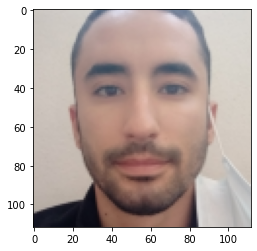

In [14]:
# display cropped image 
img = mpimg.imread(img_out_fp)
imgplot = plt.imshow(img)

Face crop, square, size is our target size. Looks good.


## Crop all

In [17]:
df_correct_root
df_incorrect_root

out_crop_correct =  r'D:\data\face_mask\test\crop\correct\\'
out_crop_incorrect =  r'D:\data\face_mask\test\crop\incorrect\\'

def face_crop_directory(in_directory, out_directory):
    counter = 0
    for root, subdirectories, files in os.walk(in_directory):
        for f in files:

            # load and recognize face
            og_img_path = os.path.join(root, f)
            img = face_recognition.load_image_file(og_img_path)
            face_locs = face_recognition.face_locations(img)

            # get crop shape
            new_face_locs = list(face_locs[0])
            width = new_face_locs[1] - new_face_locs[3]
            height = new_face_locs[2] - new_face_locs[0]

            # crop is "landscape," expand height
            if width > height:
                diff = width - height
                # add 1/2 diff to the bottom, subtract 1/2 diff from the top
                new_face_locs[2] + int(1/2 * diff)
                # prevents integer rounding issues by enforcing the whole of diff be added to the size 
                new_face_locs[0] - (diff - int(1/2 * diff))
            # crop is "portrait," expand width
            elif height > width:
                diff = height - width
                new_face_locs[1] + int(1/2 * diff)
                new_face_locs[3] - (diff - int(1/2 * diff))
            # crop is already a square
            else:
                pass

            # expand if nessisary
            expansion = .15
            amt_to_add = int(expansion * max(width, height))
            top = new_face_locs[0] - amt_to_add
            bot = new_face_locs[2] + amt_to_add
            left = new_face_locs[3] - amt_to_add
            right = new_face_locs[1] + amt_to_add
            
            # test if expansion goes out of bounds
            if sum([x < 0 for x in [top, bot, right, left]]):
                print('dims out of bounds, reverting')

                top = new_face_locs[0]
                bot = new_face_locs[2]
                left = new_face_locs[3]
                right = new_face_locs[1]

            # perform crop
            pil_img = Image.fromarray(img)
            # PIL crop format:  left, top, right, bottom
            crop = [left, top, right, bot]
            pil_crop = pil_img.crop(crop)
            
            # resize
            pil_crop = pil_crop.resize((target_h, target_w), resample=PIL.Image.Resampling.HAMMING)
            
            # same image
            out_path = os.path.join(out_directory, f)
            pil_crop.save(out_path)
            
            if counter % 10 == 0:
                print('processed: {}'.format(counter))
            counter += 1


In [16]:
face_crop_directory(df_correct_root, out_crop_correct)

processed: 0
processed: 5
processed: 10
processed: 15
processed: 20
processed: 25
processed: 30
processed: 35
processed: 40
processed: 45
dims out of bounds, reverting
processed: 50
processed: 55
processed: 60
processed: 65
processed: 70


In [18]:
face_crop_directory(df_incorrect_root, out_crop_incorrect)

processed: 0
processed: 10
processed: 20
processed: 30
processed: 40
processed: 50
processed: 60
processed: 70
processed: 80
processed: 90
processed: 100
processed: 110
processed: 120
processed: 130
processed: 140
processed: 150
processed: 160
processed: 170
processed: 180
processed: 190
processed: 200
dims out of bounds, reverting
dims out of bounds, reverting
dims out of bounds, reverting
processed: 210
dims out of bounds, reverting
dims out of bounds, reverting
dims out of bounds, reverting
processed: 220
processed: 230
processed: 240
processed: 250
processed: 260
processed: 270
